In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import xgboost as xgb


In [14]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [2]:
# Load the dataset
df = pd.read_csv('/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')


In [3]:
# Perform exploratory data analysis (EDA)
print(df.head())  # Display the first few rows of the dataset
print(df.info())  # Get information about the dataset (e.g., data types, missing values)


   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [4]:
# Data Cleaning
df = df.dropna()

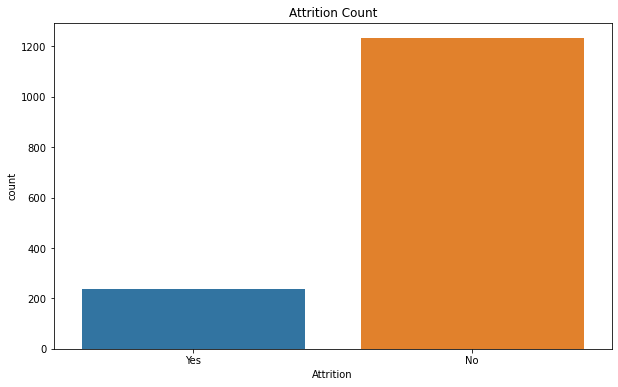

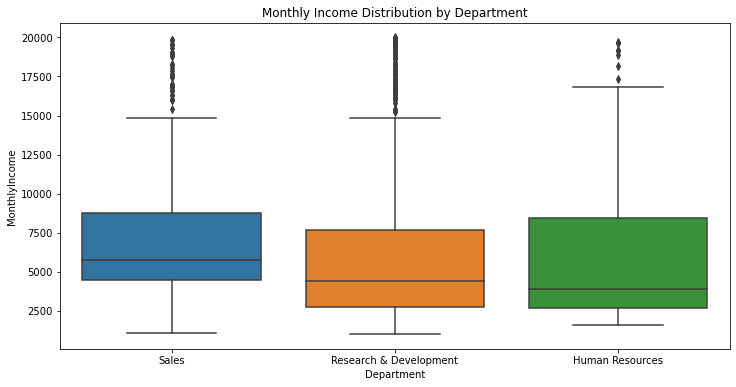

In [5]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Attrition')
plt.title('Attrition Count')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Department', y='MonthlyIncome')
plt.title('Monthly Income Distribution by Department')
plt.show()

In [6]:
# Data Preprocessing
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

selected_features = ['Age', 'MonthlyIncome', 'Department']
X = df[selected_features]
X = pd.get_dummies(X, columns=['Department'], drop_first=True)

y = df['Attrition']

In [7]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
# Implementing Machine Learning Algorithms
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)


LogisticRegression()

In [9]:
# Model Evaluation
logistic_regression_pred = logistic_regression.predict(X_test)
logistic_regression_accuracy = accuracy_score(y_test, logistic_regression_pred)
logistic_regression_cm = confusion_matrix(y_test, logistic_regression_pred)


In [10]:
print("Logistic Regression Accuracy:", logistic_regression_accuracy)
print("Logistic Regression Confusion Matrix:")
print(logistic_regression_cm)


Logistic Regression Accuracy: 0.8616780045351474
Logistic Regression Confusion Matrix:
[[380   0]
 [ 61   0]]


In [11]:
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_test, y_test)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [12]:
xgb_classifier_pred = xgb_classifier.predict(X_test)
xgb_classifier_accuracy = accuracy_score(y_test, xgb_classifier_pred)
xgb_classifier_cm = confusion_matrix(y_test, xgb_classifier_pred)



In [13]:
print("xgb classifier Accuracy:", xgb_classifier_accuracy)
print("xgb classifier Confusion Matrix:")
print(xgb_classifier_cm)

xgb classifier Accuracy: 0.9954648526077098
xgb classifier Confusion Matrix:
[[380   0]
 [  2  59]]


In [14]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

decision_tree_pred = decision_tree.predict(X_test)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_pred)
decision_tree_cm = confusion_matrix(y_test, decision_tree_pred)

print("Decision Tree Accuracy:", decision_tree_accuracy)
print("Decision Tree Confusion Matrix:")
print(decision_tree_cm)



Decision Tree Accuracy: 0.7709750566893424
Decision Tree Confusion Matrix:
[[326  54]
 [ 47  14]]


In [16]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

random_forest_pred = random_forest.predict(X_test)
random_forest_accuracy = accuracy_score(y_test, random_forest_pred)
random_forest_cm = confusion_matrix(y_test, random_forest_pred)

print("Random Forest Accuracy:", random_forest_accuracy)
print("Random Forest Confusion Matrix:")
print(random_forest_cm)


Random Forest Accuracy: 0.8253968253968254
Random Forest Confusion Matrix:
[[357  23]
 [ 54   7]]
